<a href="https://colab.research.google.com/github/Nehalokesh/Health-Insurance-Cross-Sell/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

# **Loading Dataset and Importing Modules**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Almabetter/Module 4/Capstone Project - 2(Classification)/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# **Basic Data Cleaning**

In [ ]:
df.shape

(381109, 12)

In [ ]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
#There are no null values.
df.isnull().sum().sum()

0

In [ ]:
df=df.drop("id",axis=1)

In [ ]:
df['Driving_License']=df['Driving_License'].astype('object')
df['Previously_Insured']=df['Previously_Insured'].astype('object')
df['Response']=df['Response'].astype('object')

In [ ]:
df_num=df.select_dtypes(exclude='object')
df_cat=df.select_dtypes(include='object')

Age
0.6725389977260843


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


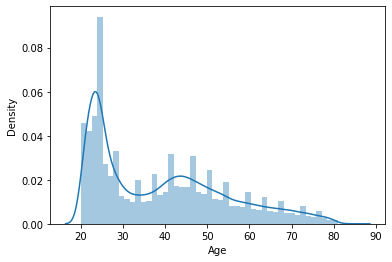

Region_Code
-0.11526641488610123


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


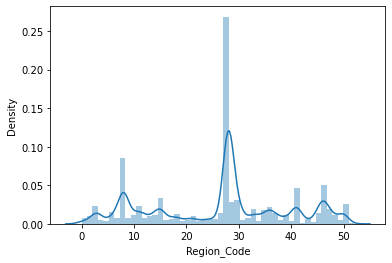

Annual_Premium
1.7660872148961309


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


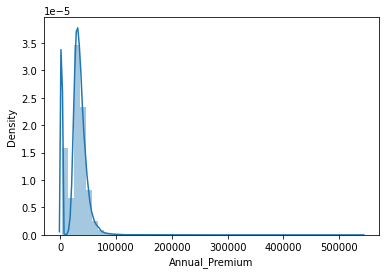

Policy_Sales_Channel
-0.9000081235103394


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


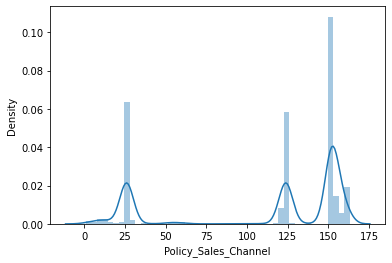

Vintage
0.0030295168899980816


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


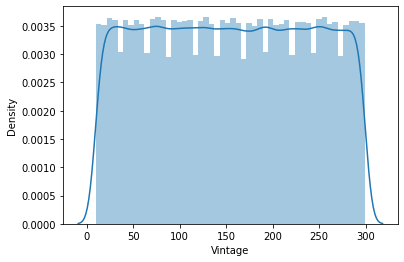

In [ ]:
#Lets see the skewness and distribution of numerical columns
for i in df_num.columns:
    print(i)
    print(df_num[i].skew())
    sns.distplot(df_num[i])
    plt.show()

# **Exploratory Data Analysis**

In [ ]:
df_cat.columns

Index(['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Response'],
      dtype='object')

In [ ]:
df_num.columns

Index(['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel',
       'Vintage'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


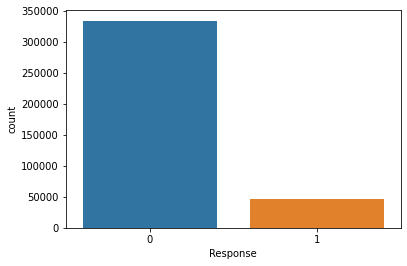

In [ ]:
 #There is a huge data imbalance
 sns.countplot(df_cat['Response'])
 plt.show()

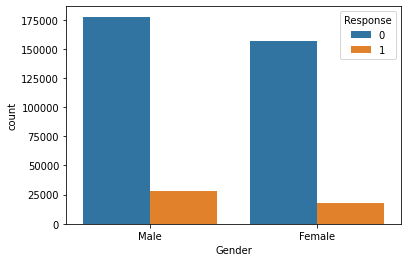

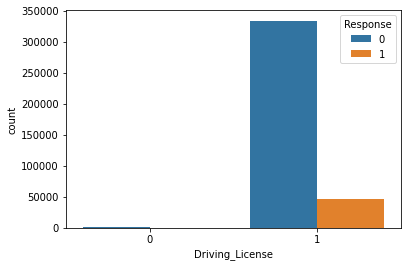

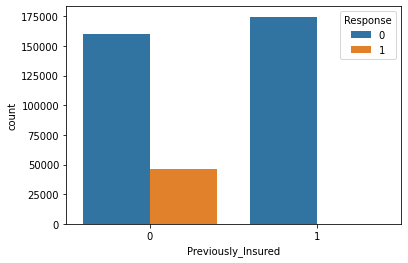

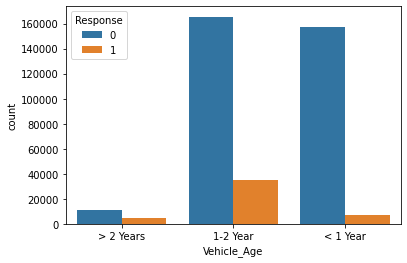

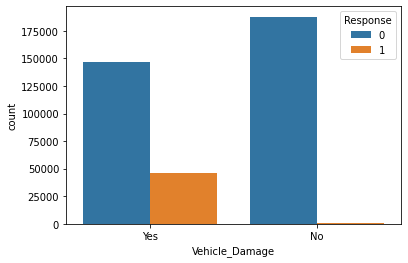

In [ ]:
for i in df_cat.columns[0:-1]:
    sns.countplot(x=df_cat[i],hue=df_cat['Response'])
    plt.show()

Observation:


* Slightly more number of male are interested in having vehicle insurance as compare to female.

* Those, who do not have driving license are not interested in vehicle insurance.

* There are people who already have vehicle insurance , they are not interested in it.

* There are more number of people whose vehicle age is between 1 to 2 years and interested in vehicle insurance.

* Out of all the people who are interested in vehicle insurance, almost all of them have the history of vehicle damage.

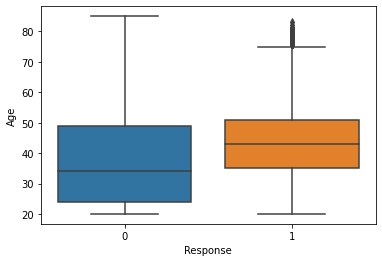

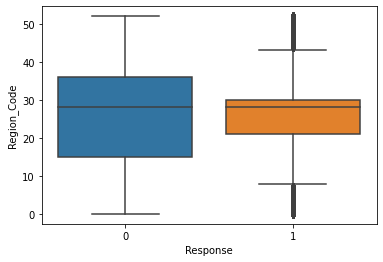

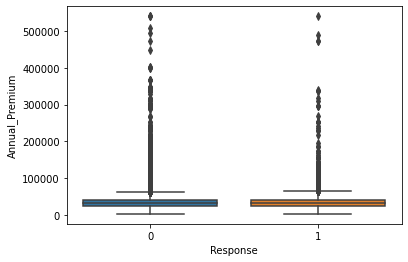

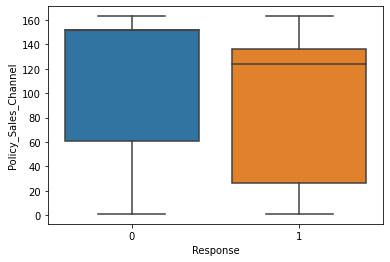

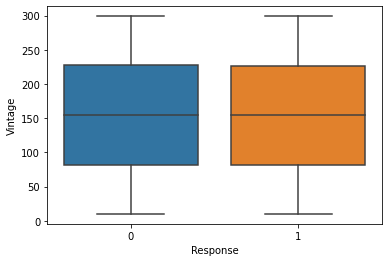

In [ ]:
for i in df_num.columns:
    sns.boxplot(x=df_cat['Response'],y=df_num[i])
    plt.show()

Observation:

* Mean age is higher for those who are interested in vehicle insurance as compare to who are not.

* Mean Regional code is same for both response.

* Mean annual income is same for both response.

* Mean policy channels are different for both response.

* Mean vintage days are same for both response.

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


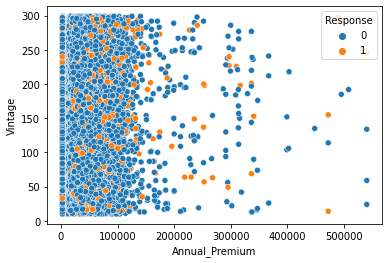

In [ ]:
sns.scatterplot(x=df_num['Annual_Premium'],y=df_num['Vintage'],hue=df_cat['Response'])
plt.show()

* There is no relationship between vintage days of customer and annual premium.

* There are very few people who are paying very high premium and the people who are interested in vehicle insurance, there annual premium are low.

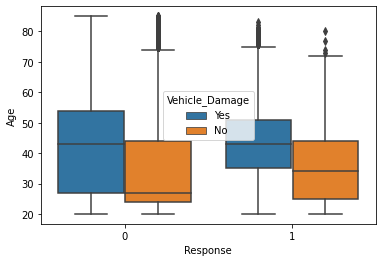

In [ ]:
sns.boxplot(y=df_num['Age'],hue=df_cat['Vehicle_Damage'],x=df_cat['Response'])
plt.show()

* The mean age of the customer is high who have the history of vehicle damage irrespective of their response for vehicle insurance.

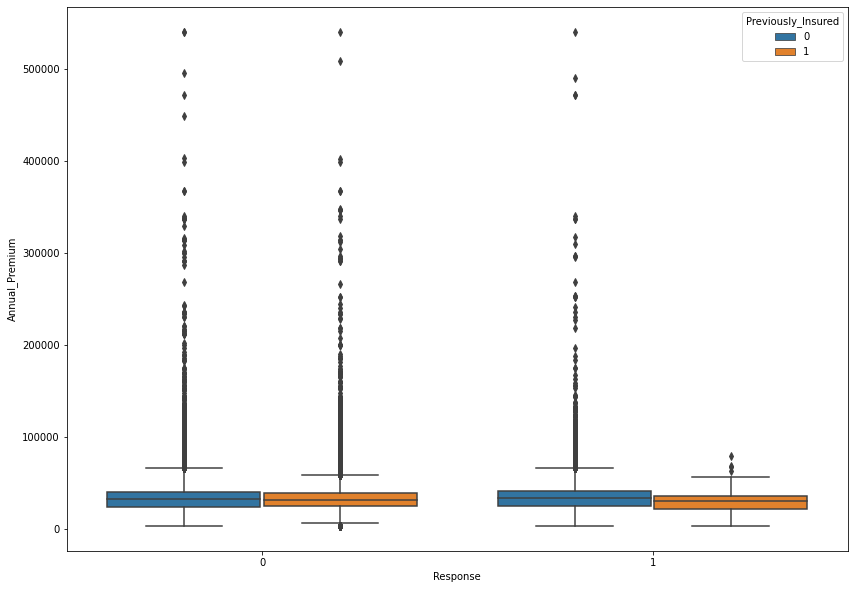

In [ ]:
plt.figure(figsize=[14,10])
sns.boxplot(x=df_cat['Response'],y=df_num['Annual_Premium'],hue=df_cat['Previously_Insured'])
plt.show()

* If we want to compare the annual premium with previously insured and their response then we can observe that mean annnual premium is high for those who do not have previous insurance and we can observe that there are customer who already have insurance and they are still interesed in it. Mean annual premium is same for those people who are not interested in vehicle response irrespective of the status of their previous insurance.

# **Statistical Test**

In [ ]:
#As we observed earlier in EDA that some of the mean values of numerical columns were same so now we can 
#Perfom some statistical test and observe some evidence to drop them.
from scipy.stats import stats

In [ ]:
for i in df_num.columns:
    df_1=df[df['Response']==1][i]
    df_0=df[df['Response']==0][i]
    print(i)
    tsats,pval=stats.ttest_ind(df_1,df_0)
    print(pval)
    tstas,pval=stats.mannwhitneyu(df_1,df_0)
    print(pval)

Age
0.0
0.0
Region_Code
6.783916512057903e-11
0.22909579533424512
Annual_Premium
3.7223151414267487e-44
4.570648777804621e-98
Policy_Sales_Channel
0.0
0.0
Vintage
0.5167036521412091
0.2581504947885175


In [ ]:
#AS we can see that vintage column is passing both the test so if we take the significance level of 5%
#the for vintage column we fail to reject h0 which means mean value of vintage days are same hence we 
#can drop the column.
#We can drop the columns like regional code and policy sales channel as it will not have any effect
#on the response of the customer beacause thease values are just the way of communications.

In [ ]:
df_num=df_num.drop(['Vintage','Policy_Sales_Channel','Region_Code'],axis=1)

In [ ]:
df_cat.columns

Index(['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Response'],
      dtype='object')

In [ ]:
df_num.columns

Index(['Age', 'Annual_Premium'], dtype='object')

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
df_num_pt=pt.fit_transform(df_num)
df_num_pt=pd.DataFrame(df_num_pt)
df_num_pt.columns=df_num.columns
df_num_pt.head()

,Age,Annual_Premium
0,0.571865,0.612207
1,1.765186,0.243028
2,0.728579,0.498644
3,-1.452684,-0.030214
4,-0.506661,-0.094107


In [ ]:
df_cat=df_cat.drop('Response',axis=1)
df_cat_dum=pd.get_dummies(df_cat,columns=list(df_cat.columns),drop_first=True)
df_cat_dum.head()

,Gender_Male,Driving_License_1,Previously_Insured_1,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,0,0,1,1
1,1,1,0,0,0,0
2,1,1,0,0,1,1
3,1,1,1,1,0,0
4,0,1,1,1,0,0


In [ ]:
X=pd.concat([df_cat_dum,df_num_pt],axis=1)
y=df['Response']

# **Multicollinearity**

In [ ]:
#Multicollinearity is in acceptable range.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['feature']=X.columns
vif.sort_values('VIF',ascending=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,VIF,feature
1,15.600713,Driving_License_1
3,7.102841,Vehicle_Age_< 1 Year
5,6.324923,Vehicle_Damage_Yes
2,5.720264,Previously_Insured_1
6,3.847655,Age
0,2.236319,Gender_Male
4,1.127178,Vehicle_Age_> 2 Years
7,1.007586,Annual_Premium


In [ ]:
#There is a huge data imbalance so we will have to treat that.
y.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

# **Data Imbalance Treatment using smote NC**

In [ ]:
from sklearn.model_selection import train_test_split
y=y.astype('int64')
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,stratify=y)
from imblearn.over_sampling import SMOTENC
X.head()

,Gender_Male,Driving_License_1,Previously_Insured_1,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Age,Annual_Premium
0,1,1,0,0,1,1,0.571865,0.612207
1,1,1,0,0,0,0,1.765186,0.243028
2,1,1,0,0,1,1,0.728579,0.498644
3,1,1,1,1,0,0,-1.452684,-0.030214
4,0,1,1,1,0,0,-0.506661,-0.094107


In [ ]:
ytrain.value_counts()

0    234079
1     32697
Name: Response, dtype: int64

In [ ]:
smotenc = SMOTENC([0,1,2,3,4,5])
X_oversample,y_oversample = smotenc.fit_resample(xtrain,ytrain)

In [ ]:
y_oversample.value_counts()

0    234079
1    234079
Name: Response, dtype: int64

In [ ]:
X_oversample.tail()

,Gender_Male,Driving_License_1,Previously_Insured_1,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Age,Annual_Premium
468153,0,1,0,1,0,0,-1.035627,-1.804717
468154,1,1,0,0,0,1,1.166348,0.456365
468155,0,1,0,0,0,1,1.004768,-0.133114
468156,1,1,0,0,0,1,0.625672,-1.804717
468157,0,1,0,0,0,1,1.381805,0.072088


# **Model Building**

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_oversample,y_oversample)

LogisticRegression()

In [ ]:
from sklearn.metrics import  accuracy_score , classification_report , confusion_matrix , plot_roc_curve
ypred=log.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100320
           1       0.25      0.97      0.40     14013

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


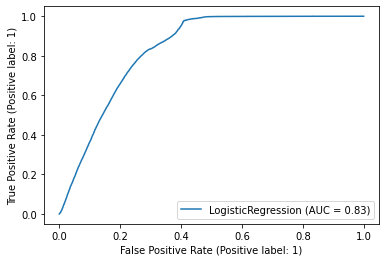

In [ ]:
plot_roc_curve(log , xtest , ytest)
plt.show()

In [ ]:
from sklearn.model_selection import KFold,cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=7)
score = cross_val_score(log , X , y , cv=kf , scoring='roc_auc')
bias1 = np.mean(1-score)
variance1 = np.std(score , ddof=1)
print(bias1 , variance1)

0.16685109571690962 0.00121705575180303


In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_oversample,y_oversample)

GaussianNB()

In [ ]:
ypred=NB.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100320
           1       0.25      0.98      0.40     14013

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


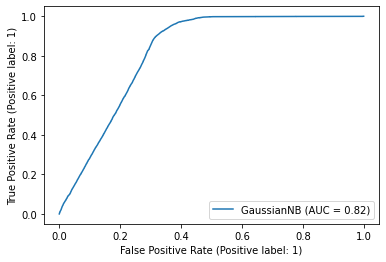

In [ ]:
plot_roc_curve(NB , xtest , ytest)
plt.show()

In [ ]:
kf = KFold(shuffle=True , n_splits=5 , random_state=7)
score = cross_val_score(NB , X , y , cv=kf , scoring='roc_auc')
bias1 = np.mean(1-score)
variance1 = np.std(score , ddof=1)
print(bias1 , variance1)

0.1837525132744106 0.0026797847478662274


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_oversample,y_oversample)

KNeighborsClassifier()

In [ ]:
ypred=KNN.predict(xtest)
print(classification_report(ytest,ypred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


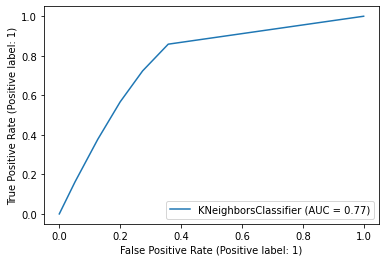

In [ ]:
plot_roc_curve(KNN , xtest , ytest)
plt.show()

In [ ]:
kf = KFold(shuffle=True , n_splits=5 , random_state=7)
score = cross_val_score(KNN , X , y , cv=kf , scoring='roc_auc')
bias1 = np.mean(1-score)
variance1 = np.std(score , ddof=1)
print(bias1 , variance1)

0.25115044649725976 0.004260454548226259


In [ ]:
knn_tuned=KNeighborsClassifier(n_neighbors=96,weights='uniform')
knn_tuned.fit(X_oversample,y_oversample)

KNeighborsClassifier(n_neighbors=96)

In [ ]:
ypred=knn_tuned.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82    100320
           1       0.28      0.77      0.41     14013

    accuracy                           0.73    114333
   macro avg       0.62      0.74      0.62    114333
weighted avg       0.87      0.73      0.77    114333



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


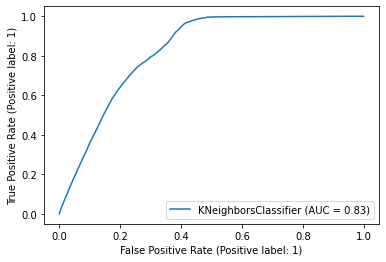

In [ ]:
plot_roc_curve(knn_tuned , xtest , ytest)
plt.show()

In [ ]:
kf = KFold(shuffle=True , n_splits=5 , random_state=7)
score = cross_val_score(knn_tuned , X , y , cv=kf , scoring='roc_auc')
bias1 = np.mean(1-score)
variance1 = np.std(score , ddof=1)
print(bias1 , variance1)

0.1594386743183623 0.0015301760125810233


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_tuned = DecisionTreeClassifier(max_depth=110,criterion='entropy')
dt_tuned.fit(X_oversample,y_oversample)

DecisionTreeClassifier(criterion='entropy', max_depth=110)

In [ ]:
ypred=dt_tuned.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84    100320
           1       0.27      0.61      0.37     14013

    accuracy                           0.75    114333
   macro avg       0.60      0.69      0.61    114333
weighted avg       0.85      0.75      0.79    114333



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


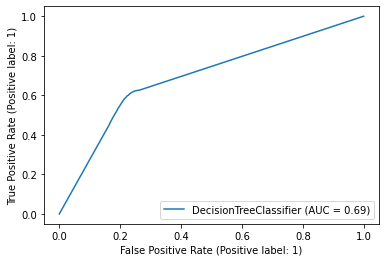

In [ ]:
plot_roc_curve(dt_tuned , xtest , ytest)
plt.show()

In [ ]:
kf = KFold(shuffle=True , n_splits=5 , random_state=7)
score = cross_val_score(dt_tuned , X , y , cv=kf , scoring='roc_auc')
bias1 = np.mean(1-score)
variance1 = np.std(score , ddof=1)
print(bias1 , variance1)

0.3719409175154353 0.0027553491268588162


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_oversample,y_oversample)

RandomForestClassifier(n_estimators=200)

In [ ]:
ypred=rf.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.77      0.85    100320
           1       0.27      0.60      0.37     14013

    accuracy                           0.75    114333
   macro avg       0.60      0.69      0.61    114333
weighted avg       0.85      0.75      0.79    114333



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


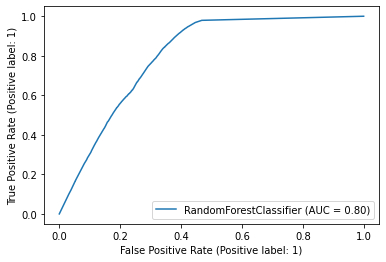

In [ ]:
plot_roc_curve(rf , xtest , ytest)
plt.show()

In [ ]:
kf = KFold(shuffle=True , n_splits=5 , random_state=7)
score = cross_val_score(rf , X , y , cv=kf , scoring='roc_auc')
bias1 = np.mean(1-score)
variance1 = np.std(score , ddof=1)
print(bias1 , variance1)

0.2129642527120666 0.002835423847194381


In [ ]:
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
GBoost=GradientBoostingClassifier(n_estimators=100)
GBoost.fit(X_oversample,y_oversample)

GradientBoostingClassifier()

In [ ]:
ypred=GBoost.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.67      0.79    100320
           1       0.28      0.92      0.43     14013

    accuracy                           0.70    114333
   macro avg       0.63      0.79      0.61    114333
weighted avg       0.90      0.70      0.75    114333



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


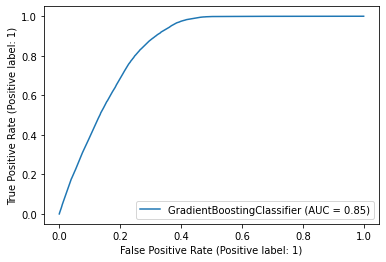

In [ ]:
plot_roc_curve(GBoost , xtest , ytest)
plt.show()

In [ ]:
kf = KFold(shuffle=True , n_splits=5 , random_state=7)
score = cross_val_score(GBoost , X , y , cv=kf , scoring='roc_auc')
bias1 = np.mean(1-score)
variance1 = np.std(score , ddof=1)
print(bias1 , variance1)

0.15375097294993817 0.0014831964134784867


# **Conclusion:**

* As per our problem statement we want to predict the status of customer whether they are interested in vehicle insurance so we need higher recall for that. As we know that Recall is the ratio of TP and (TP+FN) and we want FN negative to be minimum for the class 1(who are interested in insurance).

* So among all the above model built there are 2 models which are giving us the best results. which are KNN tuned and Gradient Boosting.

* We will choose Gradient boosting because its recall score is slightly better than KNN tuned with slightly increament in Roc Auc Score.

# **Evaluation of Final Model**

In [ ]:
ypred_train = GBoost.predict(xtrain)
ypred_test = GBoost.predict(xtest)

In [ ]:
accuracy_score(ytrain , ypred_train)

0.6971504183284853

In [ ]:
accuracy_score(ytest , ypred_test)

0.696850428135359

In [ ]:
#If we compare the above results and bias,variance error which has been previously calculated we can
#say that model is not overfit.
print(confusion_matrix(ytest,ypred_test))

[[66783 33537]
 [ 1123 12890]]


In [ ]:
ytest.value_counts()

0    100320
1     14013
Name: Response, dtype: int64

* As we can see the above results we can say that we are able to predict 70% of 
the class correctly. our Roc auc score is 85% which means that model is able to distinguish between the negative and positive classes. we can see the confusion metrix that the number of false negatives are very very less which is addressing our problem statement. In test data set there are 14013 customers who are interested in vehicle insurance and out of that 12845 have been classified correctly.